In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from PIL import Image


%matplotlib inline

In [3]:
def get_mask_from_blue(x):
    x_mask = np.zeros(x.shape)
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            if not np.all(x[i, j, :] == [255, 237, 237]):
                x_mask[i, j, :] = [1, 1, 1]
    return x_mask


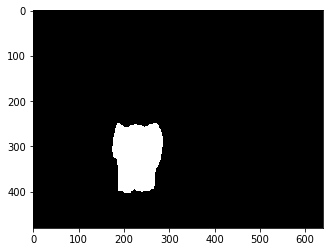

In [6]:
x = cv2.imread("images/heaps/{}/heap_rgb.png".format("elephant_cat"))
x_mask = get_mask_from_blue(x)

masked = x_mask * x/255.
# plt.imshow(masked)


left_mask = np.zeros(x_mask.shape)
for i in range(left_mask.shape[0]):
    for j in range(left_mask.shape[1]):
        if j < left_mask.shape[1]//2:
            left_mask[i, j, :] = [1, 1, 1]


obj1_mask = x_mask * left_mask
plt.imshow(obj1_mask)

np.save("images/heaps/elephant_cat/obj1_mask.npy", obj1_mask)





[1.         0.92941176 0.92941176]
[0.92941177 0.92941177 1.        ]


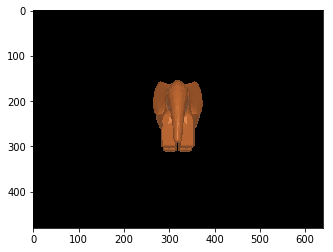

In [4]:
x = cv2.imread("simple_target/elephant.png")
x2 = plt.imread("simple_target/elephant.png")
x3 = Image.open("simple_target/elephant.png").convert('RGB')

print(x[0, 0, :]/255.)
print(x2[0, 0, :])


x_mask = get_mask_from_blue(x)

masked = x_mask * x/255.
plt.imshow(masked)
np.save("simple_target/target_elephant_mask.npy", x_mask)

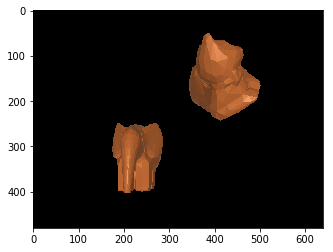

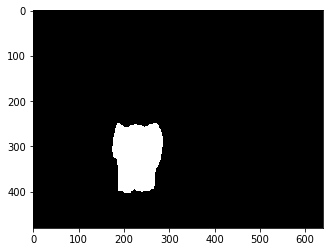

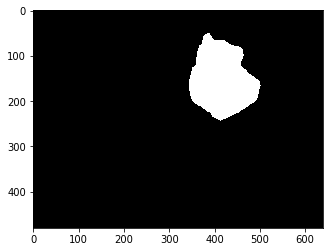

In [5]:
x = cv2.imread("simple_target/elephant_cat.png")
x_mask = get_mask_from_blue(x)

left_mask = np.zeros(x_mask.shape)
for i in range(left_mask.shape[0]):
    for j in range(left_mask.shape[1]):
        if j < left_mask.shape[1]//2:
            left_mask[i, j, :] = [1, 1, 1]
            

masked = x_mask * x/255.
plt.imshow(masked)
plt.figure()

elephant_mask = x_mask * left_mask
plt.imshow(elephant_mask)
plt.figure()
cat_mask = x_mask * (1 - left_mask)
plt.imshow(cat_mask)

np.save("simple_target/heap_elephant_mask.npy", elephant_mask)

np.save("simple_target/heap_cat_mask.npy", cat_mask)

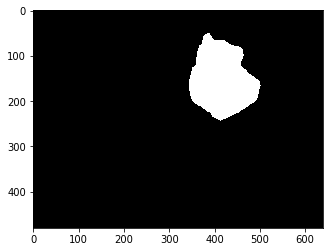

In [8]:
m = np.load("/home/davidtseng/dense-dataset/simple_target/elephant_cat/obj2_mask.npy")
plt.imshow(m)
